<a href="https://colab.research.google.com/github/erdx/Artificial-Intelligence-with-Python/blob/master/XGBoost_Reconnaissance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
import scipy
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


df=pd.read_csv("/UNSW_NB15_training-set.csv")
df.drop('label', axis=1, inplace=True)
df.drop('id', axis=1, inplace=True)


In [3]:
# Aşağıdaki feature dönüşümü ile Accuracy ve Precision yükselirken Recall düşüyor
df['sBytePerPkt']=df['sbytes']/df['spkts']
df.drop('sbytes',axis=1, inplace=True)
df.drop('spkts',axis=1, inplace=True)
df['dBytePerPkt']=df['dbytes']/df['dpkts']
df.drop('dbytes',axis=1, inplace=True)
df.drop('dpkts',axis=1, inplace=True)

# Binary Classification yapıyorum.Reconnaissance = 1; Değilse 0
df['attack_cat']=df['attack_cat'].apply(lambda x: 1 if x=='Reconnaissance' else 0)

from sklearn.preprocessing import LabelEncoder
lblE = LabelEncoder()
df['proto']= lblE.fit_transform(df['proto'])
df['service']= lblE.fit_transform(df['service'])
df['state']= lblE.fit_transform(df['state'])
#df['attack_cat'] = lblE.fit_transform(df['attack_cat'])

data=df.drop('attack_cat', axis=1)
target=df['attack_cat']

print(df.shape)

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=42)

#Standard Ölçekleme
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



(82332, 41)


Accuracy: 98.94%
Precision :95.37%
Recall :79.32%


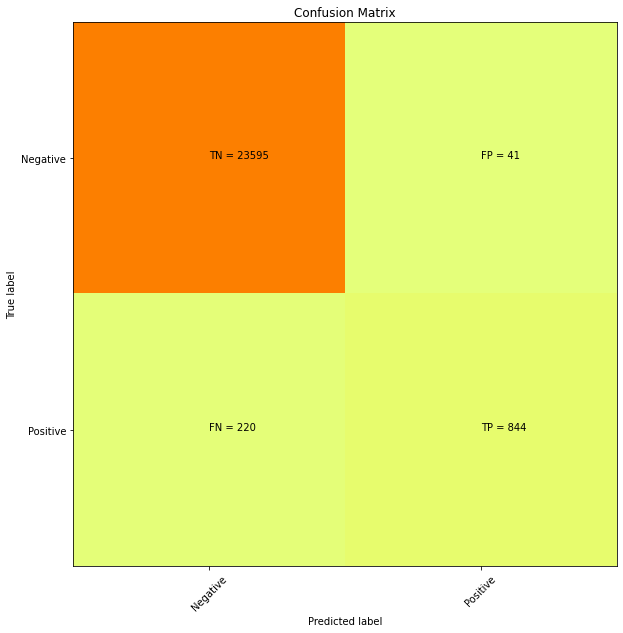

[0.04307692 0.95367232 1.        ] [1.         0.79323308 0.        ]


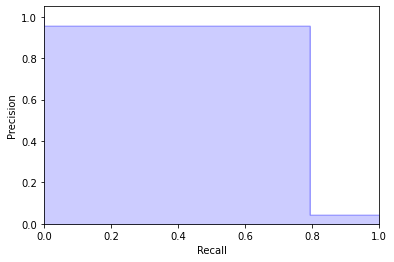

In [4]:
from xgboost import XGBClassifier
model = XGBClassifier()


model.fit(X_train_scaled, y_train)

# make predictions for test data
y_pred = model.predict(X_test_scaled)
predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test,predictions)
recall=recall_score(y_test,predictions)


print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision :%.2f%%"% (precision*100.0))
print("Recall :%.2f%%"% (recall*100.0))


import matplotlib.pyplot as plt

def confMatrix(y_test, y_predicted):
        cm = confusion_matrix(y_test, y_predicted)
        plt.figure(figsize=(15, 10))
        plt.clf()
        plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
        classNames = ['Negative', 'Positive']
        plt.title('Confusion Matrix')
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        tick_marks = np.arange(len(classNames))
        plt.xticks(tick_marks, classNames, rotation=45)
        plt.yticks(tick_marks, classNames)
        s = [['TN', 'FP'], ['FN', 'TP']]

        for i in range(2):
                for j in range(2):
                        plt.text(j, i, str(s[i][j]) + " = " + str(cm[i][j]))
        plt.show()



confMatrix(y_test,y_pred)
# TP: 568
# TN: 15713
# FP: 31
# FN: 155


import matplotlib.pyplot as plt
from inspect import signature
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
print(precision, recall)
# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
#plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.show()

Şimdi yapmak istediğim,
Modelin classification tahminlerini bir sütun olarak orijinal datasete eklemek.
Ve ardından modelin reconnaissance olarak belirlediği kayıtları silmek ve yeni bir DataFrame oluşturup bu kez attack_cat kısmından MultiClassification yapmak.


